In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np

In [2]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [8]:

train_data = train_datagen.flow_from_directory(
    "./face_data/Train",
    target_size=(150,150),
    color_mode="grayscale",
    batch_size=20,
    class_mode='categorical'

)
test_data =test_datagen.flow_from_directory(
    "./face_data/Test",
    target_size=(150,150),
    color_mode="grayscale",
    batch_size=20,
    class_mode='categorical'

)

Found 660 images belonging to 6 classes.
Found 120 images belonging to 6 classes.


In [9]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam,RMSprop

In [10]:

model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['acc'])

In [12]:
hist = model.fit_generator(train_data,epochs=15,verbose=1,validation_data = test_data)

Epoch 1/15
33/33 [==============================] - 5s 148ms/step - loss: 2.2776 - acc: 0.1803 - val_loss: 1.6533 - val_acc: 0.3750
Epoch 2/15
33/33 [==============================] - 4s 109ms/step - loss: 1.4517 - acc: 0.4612 - val_loss: 1.5833 - val_acc: 0.3917
Epoch 3/15
33/33 [==============================] - 4s 111ms/step - loss: 1.3001 - acc: 0.5217 - val_loss: 1.4456 - val_acc: 0.4667
Epoch 4/15
33/33 [==============================] - 4s 115ms/step - loss: 1.2381 - acc: 0.5478 - val_loss: 1.5221 - val_acc: 0.4750
Epoch 5/15
33/33 [==============================] - 4s 111ms/step - loss: 1.1115 - acc: 0.6161 - val_loss: 1.5043 - val_acc: 0.4917
Epoch 6/15
33/33 [==============================] - 4s 129ms/step - loss: 1.0925 - acc: 0.6105 - val_loss: 1.3838 - val_acc: 0.5417
Epoch 7/15
33/33 [==============================] - 4s 122ms/step - loss: 1.0113 - acc: 0.6356 - val_loss: 1.3629 - val_acc: 0.5167
Epoch 8/15
33/33 [==============================] - 4s 113ms/step - loss: 0.

In [15]:
predicted=model.predict(test_data)

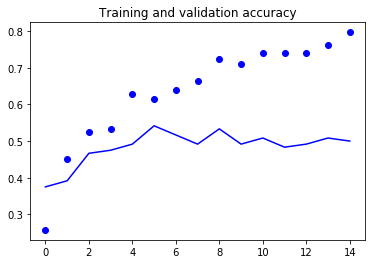

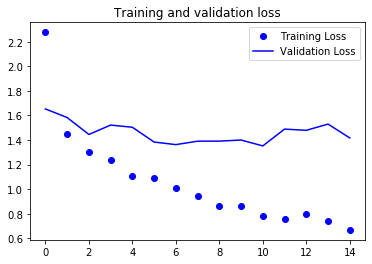

In [22]:
import matplotlib.pyplot as plt
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

5